<h1 style="text-align:center;">Long Short-Term Memory model to predict temperature at 12pm</h1>

The aim of this project is to predict temperature to use a LSTM model to predict the temperature at 12pm, as a function of several variables: wind direction, wind speed, dew point, atmospheric pressure, humidity and precipitation.

<h3>Preparing the data</h3>

In [1]:
import pandas as pd
import  numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

file_path = './weather.csv'
weather_data = pd.read_csv(file_path,sep=';')

weather_data.head(10)

,id,date,vent_direction,vent_vitesse,humidite,pluie_12,pluie_24,temperature,point_rosee,hpa
0,7015,20190801120000,270,3.8,57,0.0,0.0,23.1,14.1,1011.7
1,7015,20190802120000,320,6.0,57,0.0,0.0,22.8,13.8,1011.9
2,7015,20190803120000,350,2.2,59,0.0,0.0,22.6,14.2,1013.9
3,7015,20190804120000,90,1.8,45,0.0,0.0,26.1,13.2,1009.3
4,7015,20190805120000,220,6.6,45,0.0,0.0,24.5,11.8,1006.2
5,7015,20190806120000,220,4.8,50,0.0,-0.1,22.2,11.3,1005.3
6,7015,20190807120000,240,7.7,50,-0.1,-0.1,23.2,12.2,1002.7
7,7015,20190808120000,210,3.7,66,0.4,0.4,21.7,15.1,1007.2
8,7015,20190809120000,180,5.5,80,6.4,6.6,23.9,20.2,1000.0
9,7015,20190810120000,220,10.4,43,0.0,0.2,23.4,10.1,1005.7


In [2]:
x_data = weather_data.drop(weather_data.columns[[0, 1, 7]], axis=1, inplace=False)
y_data = weather_data[['temperature']]

In [3]:
pd_x_train, pd_x_test, pd_y_train, pd_y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_train = np.array(pd_x_train)
y_train = np.array(pd_y_train)
x_test = np.array(pd_x_test)
y_test = np.array(pd_y_test)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(x_train)
X_train = X_train_normalized.reshape((X_train_normalized.shape[0], 1, X_train_normalized.shape[1]))
Y_train_normalized = scaler.fit_transform(y_train)
Y_train = Y_train_normalized.reshape((Y_train_normalized.shape[0], 1, Y_train_normalized.shape[1]))

X_test_normalized = scaler.fit_transform(x_test)
X_test = X_test_normalized.reshape((X_test_normalized.shape[0], 1, X_test_normalized.shape[1]))
Y_test_normalized = scaler.fit_transform(y_test)
Y_test = Y_test_normalized.reshape((Y_test_normalized.shape[0], 1, Y_test_normalized.shape[1]))

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")
pd_x_train.head(5)

X_train shape: (1493, 1, 7)
X_test shape: (374, 1, 7)
Y_train shape: (1493, 1, 1)
Y_test shape: (374, 1, 1)


,vent_direction,vent_vitesse,humidite,pluie_12,pluie_24,point_rosee,hpa
1134,210,8.2,89,6.9,10.2,15.1,1002.2
244,80,2.6,38,0.0,0.0,-4.0,1016.0
1157,250,3.1,96,10.5,10.7,12.8,1015.1
1245,230,11.1,74,-0.1,2.0,5.8,1000.9
721,50,6.0,45,0.0,0.0,11.4,1010.2


<h3>Building the model</h3>

In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]))) # 256 neurones LSTM
model.add(Dropout(0.2))
model.add(Dense (1))
model.add(Flatten())
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [5]:
tf.saved_model.save(model, 'model')
model.summary()

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 256)         │       270,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,593 (1.03 MB)

 Trainable params: 270,593 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.8570 - mae: 0.7706 - val_loss: 0.4219 - val_mae: 0.5318
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2859 - mae: 0.4313 - val_loss: 0.0488 - val_mae: 0.1634
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0329 - mae: 0.1387 - val_loss: 0.0141 - val_mae: 0.0825
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - mae: 0.0813 - val_loss: 0.0103 - val_mae: 0.0659
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0127 - mae: 0.0791 - val_loss: 0.0082 - val_mae: 0.0602
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0104 - mae: 0.0685 - val_loss: 0.0066 - val_mae: 0.0537
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mae: 0.0610 - val_loss: 0.0053 - val_mae: 0.0453
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0068 - mae: 0.0594 - val_loss: 0.0047 - val_mae: 0.0412
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.005

<h3>Model evaluation</h3>

In [7]:
# Evaluation du modèle sur l'ensemble de test
loss, mae = model.evaluate(X_test, Y_test)

# Affichage des résultats
print(f'Loss: {loss}')
print(f'MAE: {mae}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mae: 0.0316
Loss: 0.001966342329978943
MAE: 0.031830355525016785


In [8]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [9]:
y_pred_reshaped = y_pred.reshape(-1, y_pred.shape[-1])
# Appliquer la dénormalisation
y_pred_denormalized = scaler.inverse_transform(y_pred_reshaped)

y_test_reshaped = Y_test.reshape(-1, Y_test.shape[-1])
# Appliquer la dénormalisation
y_test_denormalized = scaler.inverse_transform(y_test_reshaped)

In [10]:
pred = pd.DataFrame(y_pred_denormalized, columns=['Prediction'])
test = pd.DataFrame(y_test_denormalized, columns=['Actual data'])
df = pd.concat([pred,test], axis=1)
df.describe()

,Prediction,Actual data
count,374.000000,374.000000
mean,14.570447,14.537701
std,7.407597,7.263737
min,-5.154404,-4.800000
25%,8.936217,9.125000
50%,14.270420,14.200000
75%,20.881694,20.500000
max,32.897327,32.900000


Text(0, 0.5, 'Temperature in Celsius')

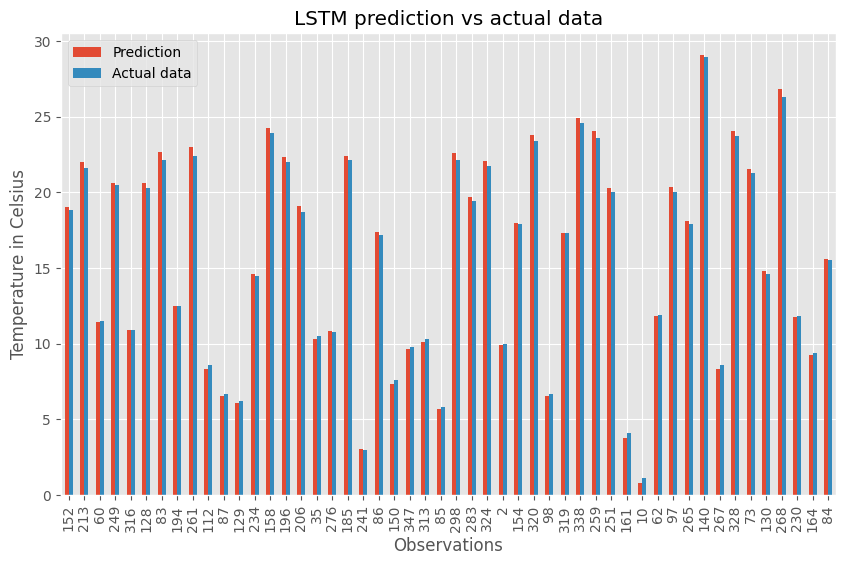

In [11]:
mpl.style.use(['ggplot'])
df.sample(n=50, replace=False).plot(title='LSTM prediction vs actual data', kind='bar',figsize=(10, 6))
plt.xlabel('Observations')
plt.ylabel('Temperature in Celsius')

Text(0, 0.5, 'Temperature in Celsius')

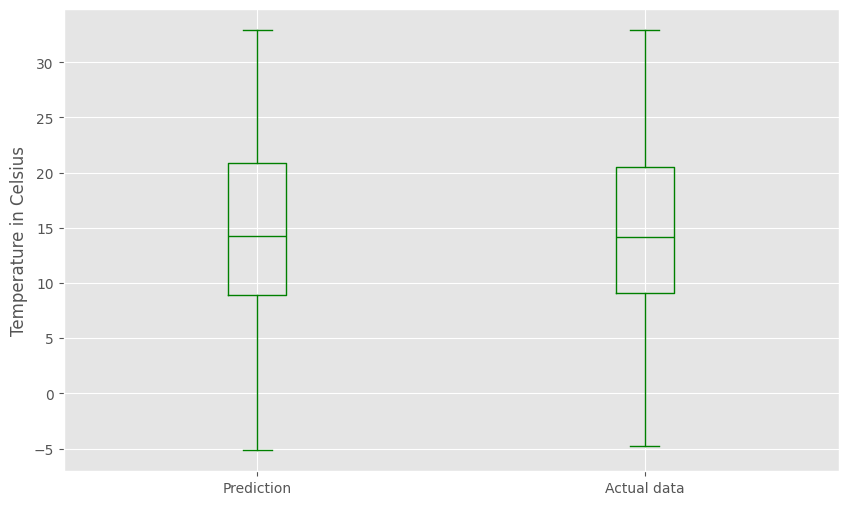

In [12]:
df[['Prediction','Actual data']].plot(kind='box', color='green', figsize=(10, 6))
plt.ylabel('Temperature in Celsius')

<h3>Citation</h3>
Essential WMO SYNOP data, Météo France